In [1]:
import pandas as pd
import numpy as np
import gensim
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pickle

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram

C:\Users\fergu\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
dft = pd.read_csv('models/14passes_265_topics_df_ht_lda(reduced_cols).csv')
dft['article_words'] = [eval(item) for item in dft['article_words']]

In [3]:
filename = 'models/id2word_265.pkl'
file = open(filename,'rb')
id2word = pickle.load(file)

lda_model = gensim.models.ldamodel.LdaModel.load('models/14passes_265_topics_ldamodel_ht')
                                                 
filename = 'models/14passes_265_topics_dict_sep13.pkl'
file = open(filename,'rb')
topics_dict = pickle.load(file)                                                                                                                                                  

In [4]:
#135,67,87,156,179,237,241

tech_labels = ['Robots & Robotics','Indian Tech & Business','Israeli Tech & Business','Tech M&A',
               'Laptops, Mobile Devices, Gadgets','Laptops, Mobile Devices, Gadgets','Audio Tech',
               'Climate Science','Digital Advertising','Ridesharing Services, E-Scooters & E-Bikes',
               'Wireless Charging Technology','E-Commerce & Online Delivery',
               'Apple Devices','Astrophysics','Automotive Technology','Virtual Reality','Audio Streaming And Apps',
               'Photo & Video Sharing','Virtual Assistants, Smart Home Tech','Data Breaches & Data Privacy',
               'Drones & Unmanned Aerial Tech','Mobile Networks, 5G','Autonomous Vehicles','Facebook Govt Intervention',
               'Hacks & Data Theft','Gaming Platforms','Astrophysics','Battery Technology',
               'Tech Investments, VC, New Initiatives',
               'New Initiatives','Space Exploration','Big Tech Govt Intervention',
               'Fake News, Misinformation, Dangerous Online Content','Twitter','Cybersecurity','Wearable Devices',
               'Cutting-Edge Mobile Devices, Gadgets','Quantum Computing','Fintech & Payments','Microsoft Apps, OS, Devices',
               'Telecoms Networks & Providers','Smartphone Tech','FAANG','Climate Science & Technology',
               'Automotive Technology','Artificial Intelligence','Chips & Processors','Astronomy & Astrophysics',
               'Software/Service Glitches, Bugs & Outages','Video Games','Nuclear Tech','Messaging Platforms',
               'Aviation & Aerospace','Amazon','Code & Software','Computer Peripherals','Satellites & Rockets',
               'Dark Web & Online Privacy','Surveillance Tech','Mobile Networks, Carriers & Eqpt','Space Exploration',
               'Apps, Gadgets & Devices'
              ]

health_labels = ['Drugs, Clinical Trials, Approvals','Meat Substitutes','Menstrual Health',
                 'Cancer Treatments & Trials','Food Poisoning, Allergies, Household Chemicals',
                 'Health Insurance & Washington Legislation','Organ Donation','Skincare','Food & Diet', 'Product Recalls',
                 'Fitness, Exercise & Diet','Mood Disorders','Sleep Health','Infectious Diseases',
                 'Health Aspects Of Body Art','Infant Nutrition','Genetic Engineering','Bloodborne Diseases & Vaccines',
                 'Medical Devices','Bacteria & Viruses','The Human Brain','Blood And Blood Diseases',
                 'Sex And Relationships','Clinical Care','Birth Control & Reproductive Health',"Children's Health",
                 'Mental Health & Disorders','Prescription Drugs','Experimental Studies',
             
              ]

tech_health_labels = tech_labels + health_labels

## Visualize 2

In [5]:
start = '2019-04-09'
end = '2019-04-09'

mini_df = dft[(dft['date'] >= start) & (dft['date'] <= end)]
mini_df.shape

(188, 11)

In [6]:
def dummy_func(doc):
    return doc

tfidf = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_func,
    preprocessor=dummy_func,
    token_pattern=None,
    max_df=0.8,
    min_df=3,
    use_idf=True,)  

tfidf_matrix = tfidf.fit_transform(mini_df['article_words'])

dist = 1 - cosine_similarity(tfidf_matrix)

In [7]:
dft.head(1)

,Unnamed: 0,date,year,month,day,author,title,article_words,publication,lda_topic,other_topics
0,0,2018-05-02 17:09:00,2018,5.0,2,Caroline Williams,You Can Trick Your Brain Into Being More Focused,"[every, day, could, like, put, finger, maybe, ...",Vice,257,"[61, 166, 227]"


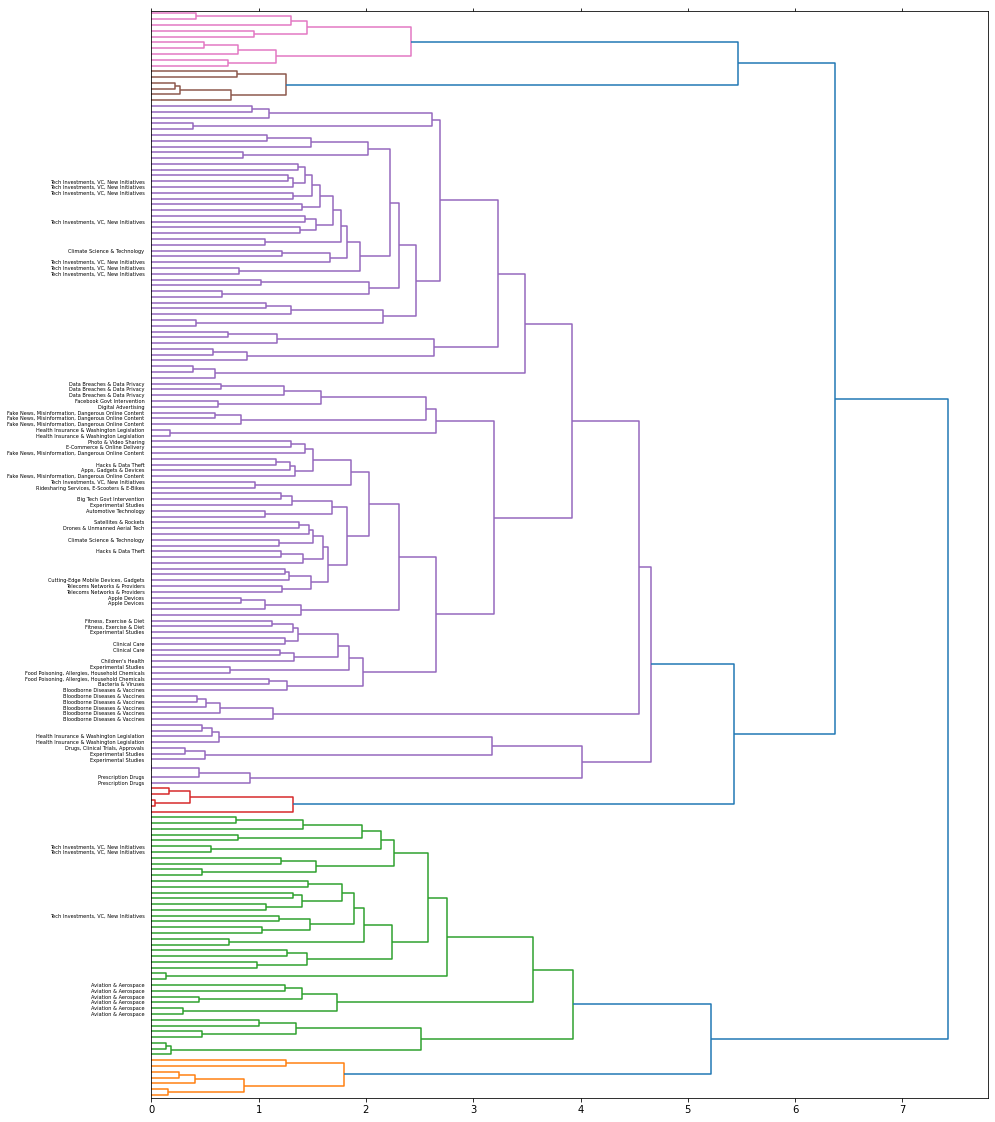

In [8]:
linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size

lda_topics = [mini_df.iloc[i,9] for i in range(len(mini_df))]
label_names = [topics_dict[topic] for topic in lda_topics]
label_names = [label if label in tech_health_labels else '' for label in label_names]

ax = dendrogram(linkage_matrix, orientation="right", labels=label_names);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

#plt.tight_layout() #show plot with tight layout